<a href="https://colab.research.google.com/github/Helsonfs/Mini-Projeto3-Modelagem_Preditiva_Python_e_TensorFlow/blob/main/DSA_Python_Cap10_Mini_Projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.11


In [ ]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

     |████████████████████████████████| 454.3 MB 16 kB/s 
     |████████████████████████████████| 462 kB 53.2 MB/s 
     |████████████████████████████████| 4.0 MB 32.9 MB/s 
     |████████████████████████████████| 1.2 MB 43.0 MB/s 


In [ ]:
# Instala o Pydot
!pip install -q pydot

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [ ]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49152/49082 [==============================] - 0s 1us/step


In [ ]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [ ]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [ ]:
# Shape
dataset.shape

(506, 14)

In [ ]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [ ]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

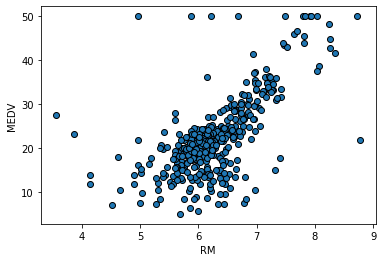

In [ ]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [ ]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [ ]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [ ]:
# Cria o modelo 
modelo = modelo_linear()

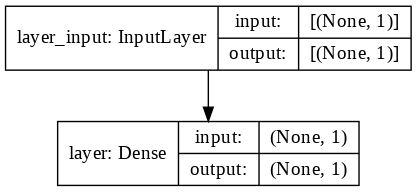

In [28]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens\modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

### Treinamento do Modelo

In [29]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [30]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [31]:
# Lista para as previsões
predictions_list = []

In [34]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [36]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [37]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [38]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

A saída de streaming foi truncada nas últimas 5000 linhas.
2/2 [==============================] - 0s 23ms/step - loss: 747.6630 - mae: 25.7952 - mse: 747.6630 - val_loss: 845.4272 - val_mae: 27.0892 - val_mse: 845.4272
Epoch 42/4000
2/2 [==============================] - 0s 26ms/step - loss: 740.4337 - mae: 25.6587 - mse: 740.4337 - val_loss: 837.9285 - val_mae: 26.9529 - val_mse: 837.9285
Epoch 43/4000
2/2 [==============================] - 0s 31ms/step - loss: 733.3324 - mae: 25.5231 - mse: 733.3324 - val_loss: 830.4854 - val_mae: 26.8169 - val_mse: 830.4854
Epoch 44/4000
2/2 [==============================] - 0s 23ms/step - loss: 726.2905 - mae: 25.3877 - mse: 726.2905 - val_loss: 823.1022 - val_mae: 26.6813 - val_mse: 823.1022
Epoch 45/4000
2/2 [==============================] - 0s 23ms/step - loss: 719.2515 - mae: 25.2527 - mse: 719.2515 - val_loss: 815.7789 - val_mae: 26.5461 - val_mse: 815.7789
Epoch 46/4000
2/2 [==============================] - 0s 23ms/step - loss: 712.3252 - 

In [39]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [40]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [41]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [42]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [43]:
df.head()

,MSE em Treino,MSE em Validação
0,1078.465454,1190.374756
1,1069.120483,1180.682251
2,1059.837646,1171.033447
3,1050.677246,1161.433228
4,1041.577393,1151.895752


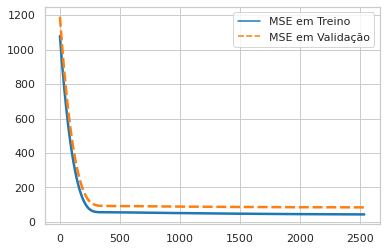

In [44]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [45]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [46]:
# Imprime as previsões
previsoes

array([20.866865, 18.370798, 23.892962, 21.28596 , 20.534056, 20.632666,
       24.509275, 21.883783, 21.02711 , 20.829885, 25.871328, 23.412237,
       21.242815, 22.703478, 23.239672, 21.58795 , 27.048487, 23.338282,
       29.569208, 19.923906, 20.398466, 20.97164 , 19.184328, 20.866865,
       18.950129, 23.498526, 22.851397, 14.223009, 17.168985, 35.479652,
       21.46469 , 18.204393, 19.973211, 22.783598, 31.72014 , 24.31206 ,
       21.78517 , 28.102385, 25.772718, 32.398087, 27.6648  , 30.764856,
       32.262497, 17.168985, 23.048613, 23.264326, 18.333818, 23.541666,
       37.507324, 35.621407, 18.130434, 34.998924, 31.26407 , 25.932962,
       23.634111, 22.783598, 26.148672, 27.917486, 24.724985, 24.33671 ,
       23.159552, 19.042578, 23.399912, 22.789762, 21.07025 , 20.195086,
       21.20584 , 22.148798, 21.62493 , 21.532484, 27.103952, 24.842089,
       10.783979, 13.939505, 17.0827  , 23.338282, 17.47098 , 17.951704,
       23.375257, 21.477015, 20.201246, 25.976103, 

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>